### CodSoft Internship

### <u><center>Task 4-Sales Prediction using Python by Patricia S</u></center>

#### What is Sales Prediction?
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product’s sales are primarily dependent on how much you spend on advertising it, as the more people your product reaches, the more sales will increase as long as the quality of your product is good. Now in the section below, I will take you through a machine learning project on sales prediction using Python.

#### <u>Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

#### Link to the dataset:https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


### Inspecting the data

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data Cleaning and Preprocessing

In [10]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
advertising.duplicated().sum()

0

#### Check for Outliers

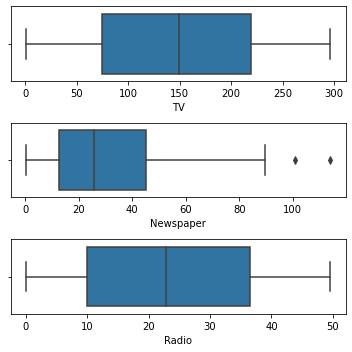

In [12]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

### Exploratory Data Analysis

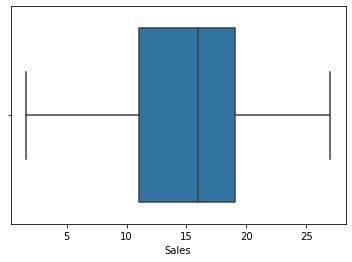

In [13]:
sns.boxplot(advertising['Sales'])
plt.show()

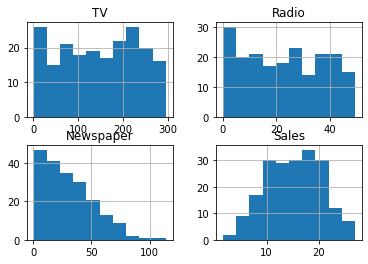

In [14]:
advertising.hist()
plt.show()

TV              AxesSubplot(0.125,0.536818;0.133621x0.343182)
Radio        AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Newspaper     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Sales        AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

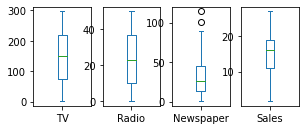

In [15]:
advertising.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

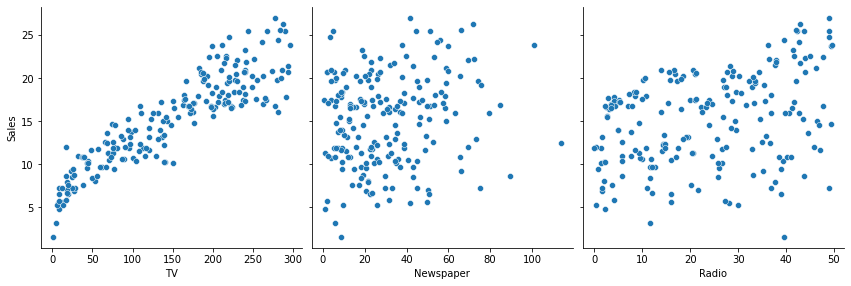

In [16]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

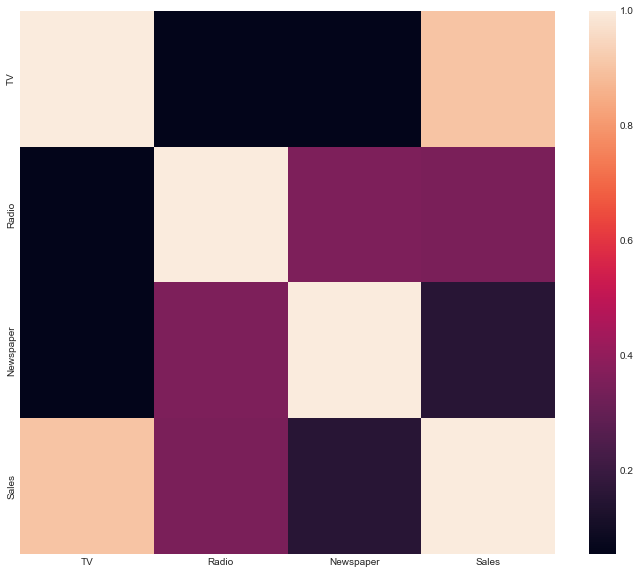

In [17]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(advertising.corr())
plt.show()

### Model Building

In [18]:
# Extracting features and target variable
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 2.907756910271093
R-squared: 0.9059011844150825


### Visualize the results

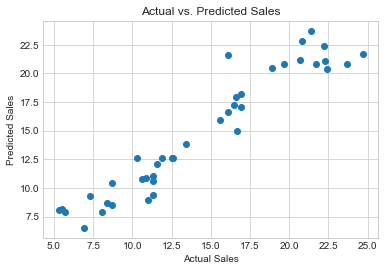

In [25]:
# Plot actual vs. predicted sales values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

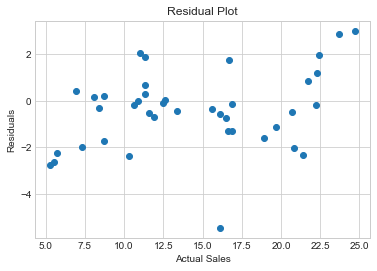

In [26]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Conclusion

Based on the provided code and dataset, a linear regression model was built and evaluated to predict sales based on the advertising spending on TV, Radio, and Newspaper.
Overall, the linear regression model provides a reasonable baseline for predicting sales based on advertising spending. However, further exploration can be done to improve the model's accuracy, such as feature engineering, considering interactions between features, or trying other advanced machine learning techniques. Additionally, gathering more data and conducting further analysis on the effectiveness of different advertising channels could lead to more accurate predictions.